# **Project 6.- Udemy Courses Dataset Analysis ipynb**
**About this Data**

This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.
Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.
This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

Dataset link:-https://www.kaggle.com/datasets/andrewmvd/udemy-courses

**What I learnt from this project:**
1.  parse_dates:  parse_dates parameter for read_csv which allows you to define the names of the columns you want to be treated as dates or datetimes:

2. value_counts()  : The value_counts() method returns a Series containing the counts of unique values

3. Countplot:  countplot() method is used to show the counts of observations in each categorical bin using bars.

4. Barplot(): Bar plots or graphs are useful for displaying relationships between categorical data and at least one numerical variable.



In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#Load the dataset
df=pd.read_csv('/content/udemy_courses.csv',parse_dates=['published_timestamp'])

In [57]:
# Check first 5 rows
df.head()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [58]:
df.tail()


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28 19:51:11+00:00,Web Development


In [59]:
df.shape

(3678, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [11]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [12]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [13]:
df.duplicated().sum()

6

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
#Find Out Number of Courses Per Subjects
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [16]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

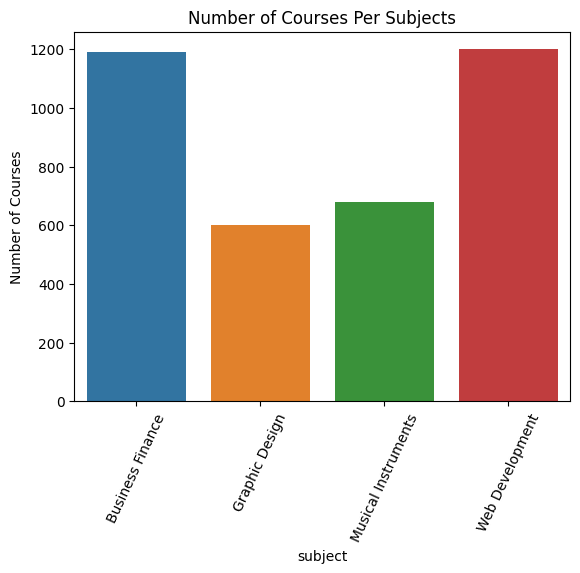

In [17]:
sns.countplot(x='subject',data=df,hue='subject')
plt.xticks(rotation=65)
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per Subjects')
plt.show()

In [18]:
#For Which Levels, Udemy Courses Providing The Courses
df['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

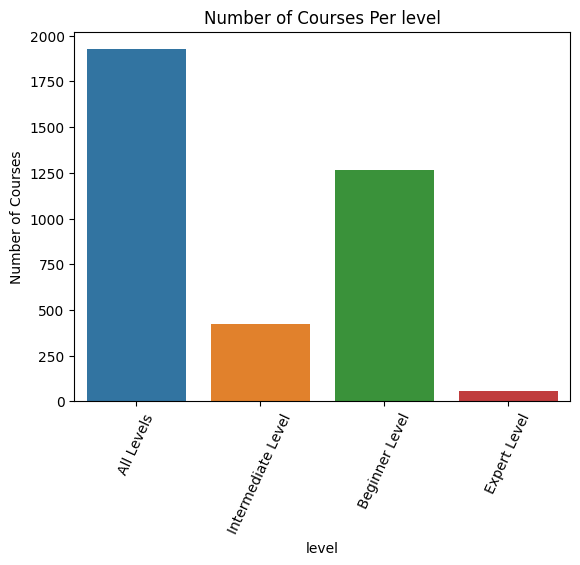

In [19]:
sns.countplot(x='level',data=df,hue='level')
plt.xticks(rotation=65)
plt.ylabel('Number of Courses')
plt.title('Number of Courses Per level')
plt.show()

In [20]:
#Display The Count of Paid and Free Courses
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [21]:
df['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

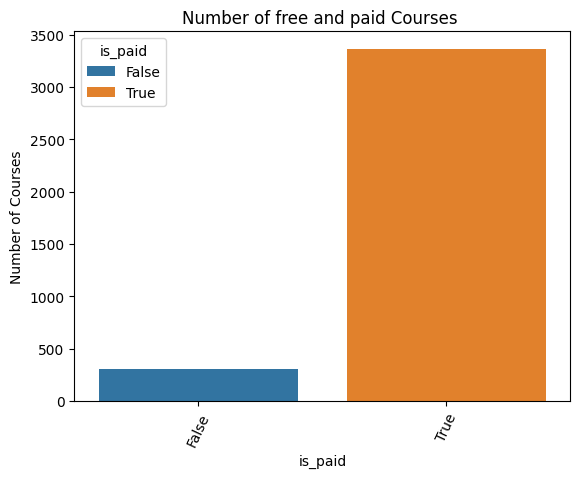

In [22]:
sns.countplot(x='is_paid',data=df,hue='is_paid')
plt.xticks(rotation=65)
plt.ylabel('Number of Courses')
plt.title('Number of free and paid Courses ')
plt.show()

In [23]:
# Which Course Has More Lectures (Free or Paid)?
df.columns
df.groupby(['is_paid'])['num_lectures'].mean()

is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

In [24]:
df.groupby(['course_title'])['num_subscribers'].max()

course_title
#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs    3137
#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key    1593
#12 Hand Coordination: Let your Hands dance with Ballad 9        482
#4 Piano Hand Coordination: Fun Piano Runs in 2 Beats C Key      850
#5  Piano Hand Coordination:  Piano Runs in 2 Beats Eb Key       940
                                                                ... 
财务分析与估值建模入门                                                      505
超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜                               8
캔바(Canva)로 SNS 콘텐츠 만들기                                            44
６時間でインターバンク市場を攻略！最短距離でトレード基礎力                                    280
７日でマスター  ビギナー向け Adobe Illustrator　どきどきセミナー                       108
Name: num_subscribers, Length: 3663, dtype: int64

In [25]:
 #Which Courses Have A Higher Number of Subscribers Free or Paid?
df.groupby(['is_paid'])['num_subscribers'].max()

is_paid
False    268923
True     121584
Name: num_subscribers, dtype: int64

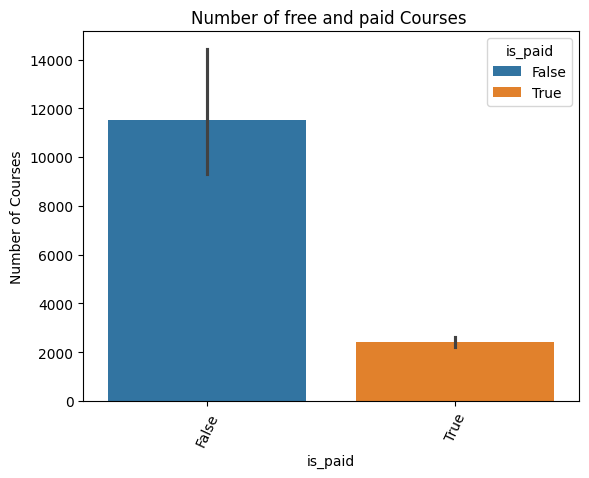

In [26]:
sns.barplot(x='is_paid',y='num_subscribers',data=df,hue='is_paid')
plt.xticks(rotation=65)
plt.ylabel('Number of Courses')
plt.title('Number of free and paid Courses ')
plt.show()

In [27]:
df.groupby(['subject'])['num_subscribers'].max()

subject
Business Finance        65576
Graphic Design          53851
Musical Instruments    101154
Web Development        268923
Name: num_subscribers, dtype: int64

In [28]:
#Which Level Has The Highest Number of Subscribers?
df.groupby(['level'])['num_subscribers'].max()

level
All Levels            268923
Beginner Level        161029
Expert Level            5172
Intermediate Level     29167
Name: num_subscribers, dtype: int64

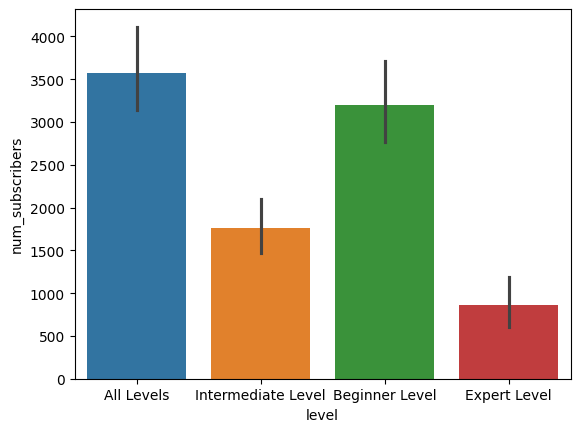

In [29]:
sns.barplot(x='level',y='num_subscribers',data=df,hue='level')
plt.show()

In [30]:
#Find Most Popular Course Title
df.groupby(['course_title'])['num_subscribers'].max().sort_values(ascending=False).head(1)

course_title
Learn HTML5 Programming From Scratch    268923
Name: num_subscribers, dtype: int64

In [31]:
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [35]:
#Display 10 Most Popular Courses As Per Number of Subscribers
top_ten_course=df.sort_values(by='num_subscribers',ascending=False).head(10)

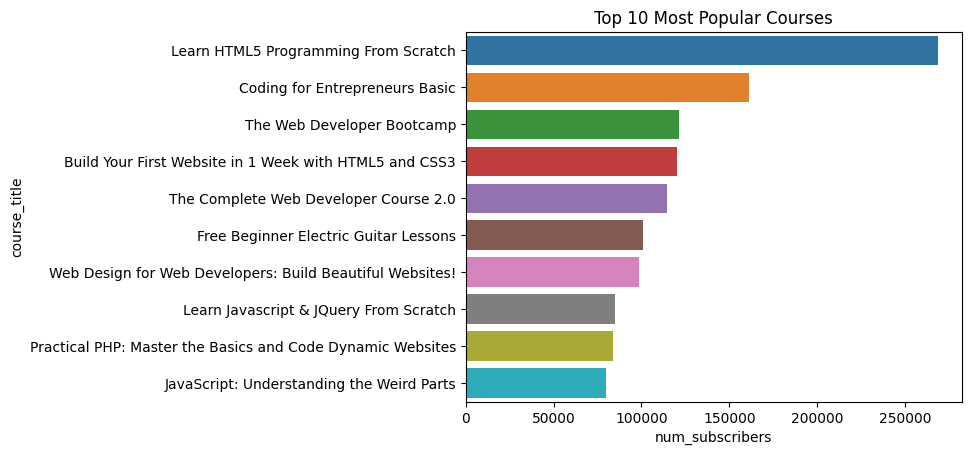

In [38]:
sns.barplot(x='num_subscribers',y='course_title',data=top_ten_course,hue='course_title')

plt.title('Top 10 Most Popular Courses')
plt.show()

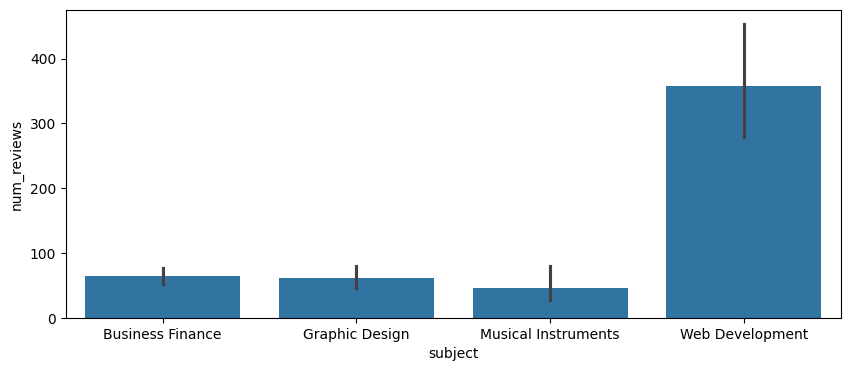

In [40]:
# Find The Course Which Is Having The Highest Number of Reviews.
plt.figure(figsize=(10,4))
sns.barplot(x='subject',y='num_reviews',data=df)
plt.show()

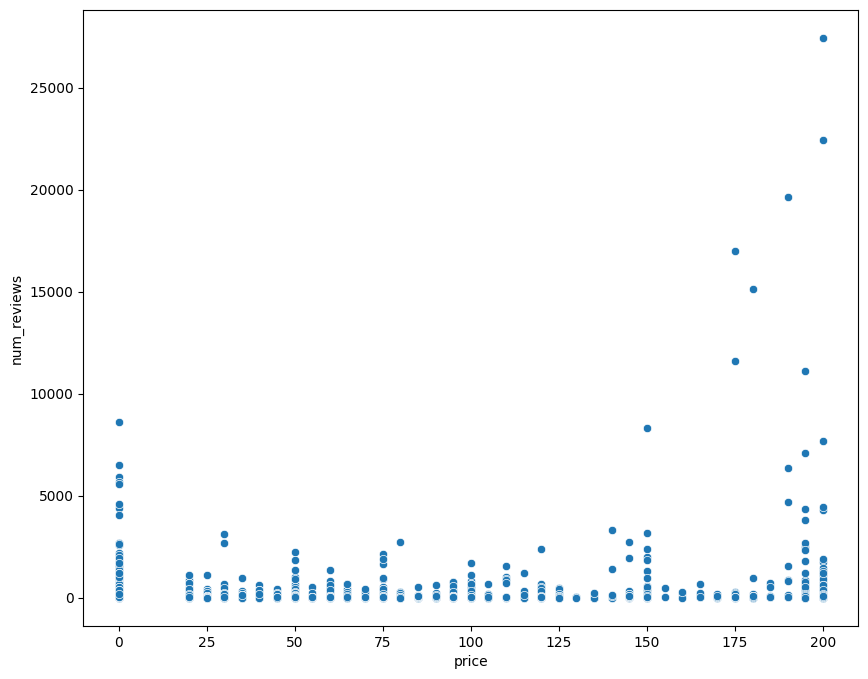

In [44]:
# Does Price Affect the Number of Reviews?
plt.figure(figsize=(10,8))
sns.scatterplot(x='price',y='num_reviews',data=df)
plt.show()

In [48]:
# Find Total Number of Courses Related To Python
len(df[df['course_title'].str.contains('Python',case=False)])

29

In [52]:
# Display 10 Most Popular Python Courses As Per Number of Subscribers
python=df[df['course_title'].str.contains('Python',case=False)]
top_10=python.sort_values(by='num_subscribers',ascending=False).head(10)

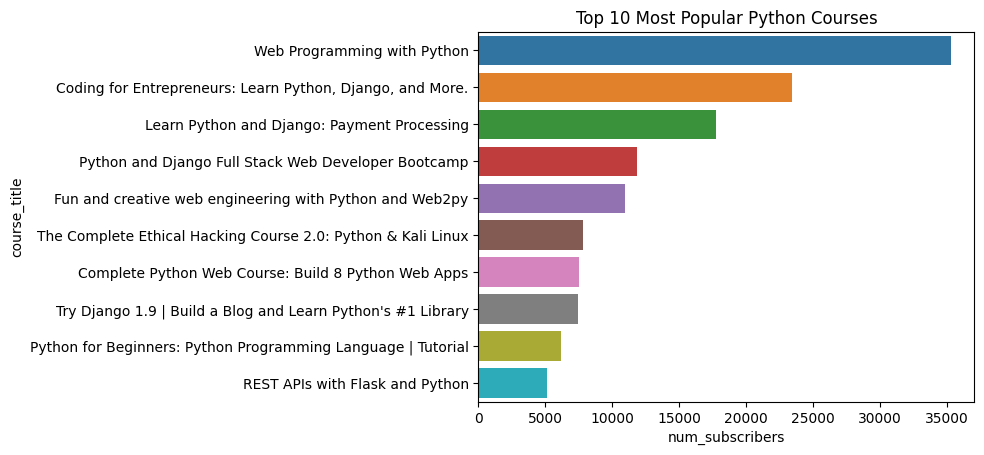

In [54]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10,hue='course_title')
plt.title('Top 10 Most Popular Python Courses')
plt.show()

In [55]:
# In Which Year The Highest Number of Courses Were Posted?
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [61]:
df['year']=df['published_timestamp'].dt.year

In [62]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


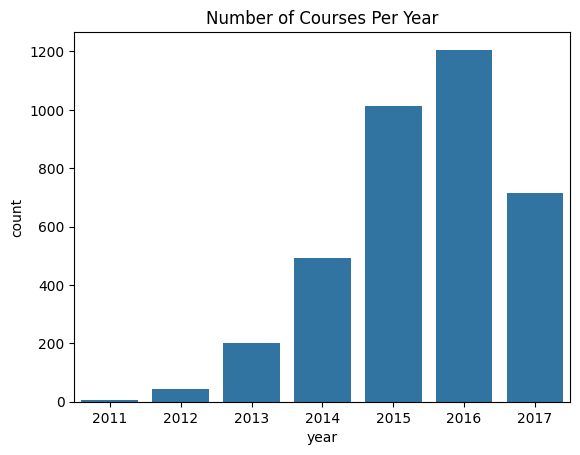

In [66]:
sns.countplot(x='year',data=df)
plt.title('Number of Courses Per Year')
plt.show()

In [67]:
# Display Category-Wise Count of Posted Subjects [Year Wise]
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [69]:
df.groupby(['year'])['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Musical Instruments     10
      Graphic Design          10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64